
***Titanic Dataset Research***
================

In [22]:
# 1st import necessary libraries to analyize the data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as sm

*load the data set*
----

In [23]:
#load the data set#
Tita_df=pd.read_csv('titanic-data.csv')

#the basic data statistics
print Tita_df.head(5)
print '---'*30
print Tita_df.describe()
print Tita_df['Parch'].unique()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

__Reseach Question__ <br>

_Try to identify some factors that affected people's survival_<br>
_Let's Check for the relationship between survival rate and numbers of family_

In [34]:
#create func to see rate of survival of certain group
def get_group_survived(group_by):
    group_result=Tita_df['Survived'].groupby(Tita_df[group_by]).sum()
    return group_result

def get_group_total(group_by):
    group_result=Tita_df[group_by].groupby(Tita_df[group_by]).count()
    return group_result

In [35]:
##Survived VS Total # of parents / children aboard the Titanic
Parch_survived_groups=get_group_survived("Parch")
Parch_groups=get_group_total('Parch')

##Survived VS Total # of siblings / spouses aboard the Titanic
Sib_survived_groups=get_group_survived('SibSp')
Sib_groups=get_group_total('SibSp')

print Parch_groups,Parch_survived_groups
print Sib_groups,Sib_survived_groups

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64 Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64 SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64


_The results seems unclear, take a visual on it_

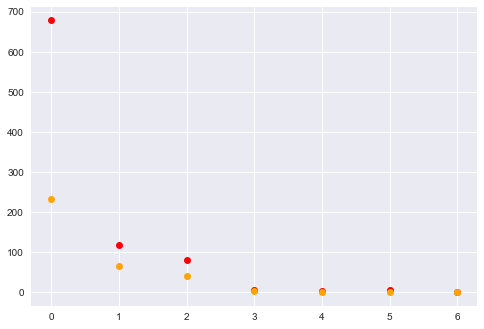

In [36]:
plt.plot(Parch_groups,'ro')
plt.plot(Parch_survived_groups,'ro',color='orange')
plt.show()

_The survival rate between people have different # of parents / children aboard the Titanic seems present a weak connection, since some group with more parents / children tends to have higher probablity of survival,while others are not_

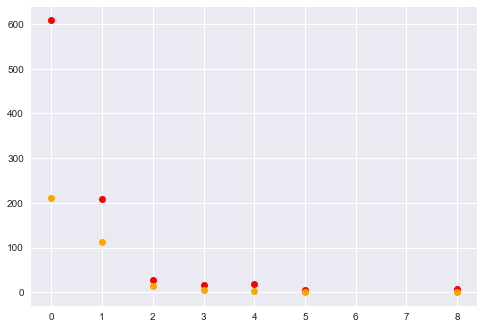

In [37]:
plt.plot(Sib_groups,'ro')
plt.plot(Sib_survived_groups,'ro',color='orange')
plt.show()

_The survival rate between people have different # of siblings/ spouse seems more consistent, which is nagetively related_

In [38]:
#Check the variable 'Age'
Tita_df['Age'].isnull().sum()
Tita_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
## Turn Age into groups, to make the relation more esay to see 
def Age_cata_groups(age):
    if age<16:
        return 'Young'
    elif age<50:
        return 'Adult'
    else:
        return 'old'
    
Tita_df['Age_group']=Tita_df['Age'].apply(Age_cata_groups)

#Survived VS Total # of people in diff age_group aboard the Titanic
Hcount_by_age=get_group_total('Age_group')
Survived_by_age=get_group_survived('Age_group')

print Hcount_by_age,Survived_by_age

Age_group
Adult    557
Young     83
old      251
Name: Age_group, dtype: int64 Age_group
Adult    214
Young     49
old       79
Name: Survived, dtype: int64


_Older people tend to have lower survival rate_

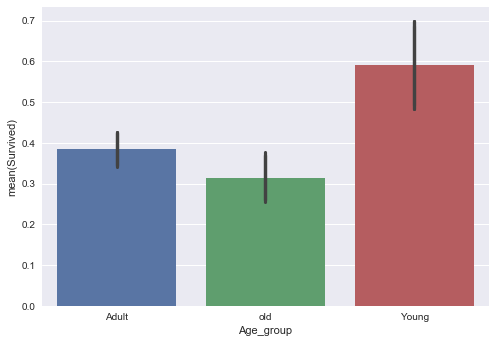

In [57]:
sns.barplot(x="Age_group", y="Survived",data=Tita_df)
plt.show()

_The result indicate that younger persons are more likely to live_

In [40]:
#Survived VS Total # of people in diff sex aboard the Titanic
HCount_by_sex=get_group_total('Sex')
Survived_by_sex = get_group_survived('Sex')
print HCount_by_sex,Survived_by_sex 

Sex
female    314
male      577
Name: Sex, dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64


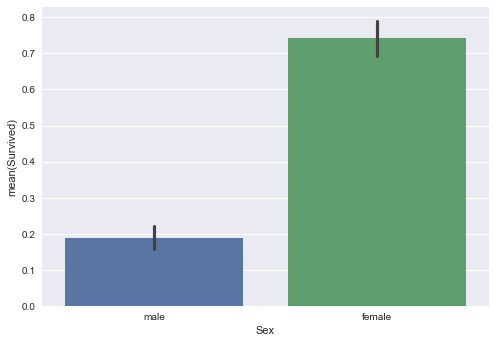

In [62]:
# visual check see if sex is a factor that impacts the survival rate
sns.barplot(x="Sex", y="Survived",data=Tita_df)
plt.show()

_seems like Female are much more likely to be safed_

In [61]:
#Survived VS Total # of people in diff ticket class aboard the Titanic
Survived_by_Pclass=get_group_survived('Pclass')
Hcount_Pclass=get_group_total('Pclass')

print Survived_by_Pclass,Hcount_Pclass

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64 Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


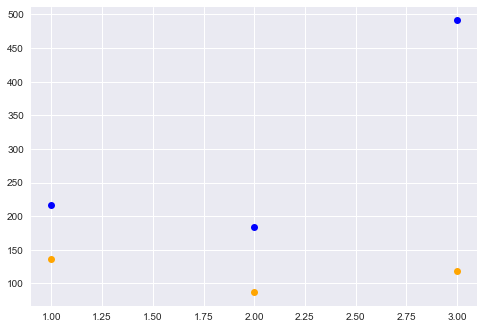

In [60]:
plt.plot(Hcount_Pclass,'ro',color='blue')
plt.plot(Survived_by_Pclass,'ro',color='orange')

plt.show()

_People when buyer higher class of ticket is also more likely to survive_

In [66]:
# now I use liner regression to test my earlier analysis
result=sm.ols(formula='Survived~Parch+Sex+SibSp+Age+Pclass',data=Tita_df).fit()
print result.params
print result.summary()

Intercept      1.401792
Sex[T.male]   -0.489797
Parch         -0.008990
SibSp         -0.051687
Age           -0.006588
Pclass        -0.205147
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     94.37
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           3.94e-76
Time:                        14:53:07   Log-Likelihood:                -323.10
No. Observations:                 714   AIC:                             658.2
Df Residuals:                     708   BIC:                             685.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P

_Regression result indicates, at a significant level of 0.1, we fail to reject the null hypothesis that survival rate is connect with sex, # of sib/spouse , Age and Ticket class. However, Parch is not a significant factor_ 

__Conclusion: I test the data set. The result suggests that Survival rate of the Titanic catastroph is related to which sex your are, how many siblings or spouse you have accompaned, whether you are a old people or young and the ticket class you get. __